In [1]:
# Import the libraries
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")
import numpy as np

import pandas as pd
import import_ipynb
from cancer_helper import *
from init_data import *

importing Jupyter notebook from cancer_helper.ipynb
importing Jupyter notebook from init_data.ipynb


In [2]:
# Process the CSV data and put it into X as features
np_data = pd.read_csv('LUAD.csv',keep_default_na=False, sep=';',header=None, encoding = "utf-8").values
X, feature_labels, vital_status, death_days_to, outcome = init_data_LUAD(np_data)
num_groups = 5

**Vital status**

In [3]:
y = vital_status
iters = 200 # recommended 40000
alpha = 0.00000001

vital_status_train(X, y, alpha, iters, num_groups, feature_labels)

In class model:
Average test accuracy: 35.04 %
Scikit model:
Average train accuracy: 78.42 %
Average test accuracy: 77.39 %
Bayes model:
Average test accuracy: 72.09 %


**Death days to**

In [4]:
dead = np.nonzero(vital_status == 0)[0]
y = death_days_to[dead].astype('int')
X_death = X[dead, :]
iters = 4000
alpha = 0.005

death_days_to_train(X_death, y, alpha, iters, num_groups)

In-class model:
Average final cost: nan
Mean in y: 732.52
Variance in y: 255209.12

Scikit model:
Average train accuracy: 40.74 %
Average test accuracy: 34.65 %


**Outcome**

In class model:
One vs all:
Average train accuracy: 67.86 %
Average train F1 score: 0.58
Average test accuracy: 53.33 %
Average test F1 score: 0.28


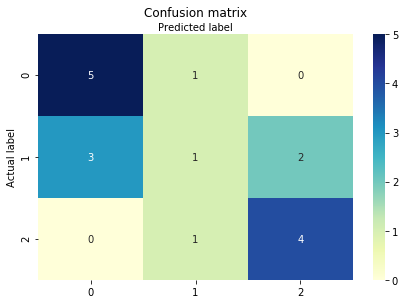


Scikit model:
Average train accuracy: 67.14 %
Average train F1 score: 0.65
Average test accuracy: 55.24 %
Average test F1 score: 0.51


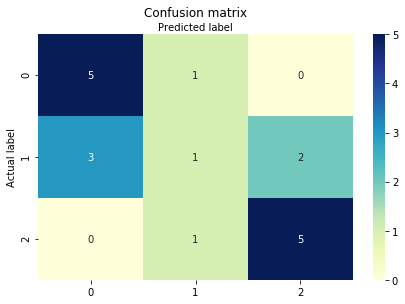


Highest average weights:
tumor_status : 9.27
tumor_stage_1a : 4.50
tumor_stage_3a : 3.49


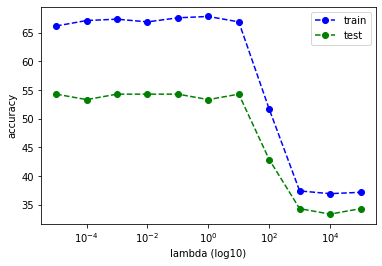

In [7]:
y = outcome
lambda_val = 1
interested_in = [0, 1, 2]

# print_num_samples(y)
outcome_train(X, y, interested_in, lambda_val, num_groups, feature_labels)